In [1]:
import torch
import torchvision
from torchvision import transforms

In [2]:
torch.cuda.is_available()

True

In [3]:
# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load('./logs/checkpoints/best_full.pth'))
# model.eval()
model = torch.load('./model_2.pt')
model.cuda()
model.eval()

FPN(
  (encoder): EfficientNetEncoder(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
    )
    (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False
          (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
        )
        (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          40, 10, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          10, 40, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (

In [4]:
import os
import random
import shutil

def copy_random_photo():
    path = 'data'
    folder = random.choice(os.listdir(path))
    path += '/' + folder
    package = random.choice(os.listdir(path))
    path += '/' + package
    path += '/' + 'color_frame.png'
    return path 
#     shutil.copyfile(path, f"./my_train/{folder}_{package}.png")

480 848
480 864
<PIL.Image.Image image mode=RGB size=864x480 at 0x7F5B565ECFD0>


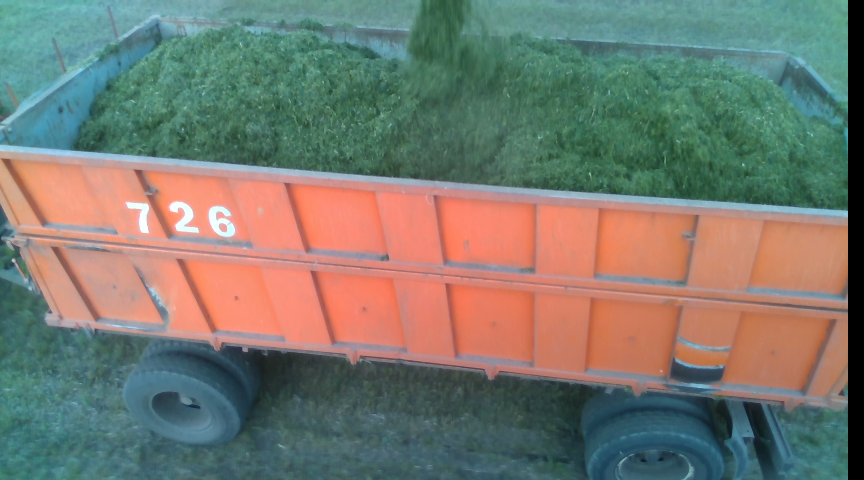

In [212]:
# image_path='/root/kaggle/valid/seq16/Labels/000000.png'
image_path='/root/data/20220719_183951/package_3060/color_frame.png'
# image_path='/root/data/20220720_104238/package_2380/color_frame.png'
# image_path = copy_random_photo()
# print(image_path)
# image_path='/root/test_data/20210929_092132_step_20/package_1240/color_frame.png'


# print(image_path)
# image_path = '/root/6a16ec/frame_100.png'
import numpy as np
from PIL import Image
from torchvision import transforms

trans = transforms.Compose([transforms.ToTensor()])


demo = Image.open(image_path)
height, width = demo.height, demo.width
print(height, width)
height += 32 - (demo.height % 32) if (demo.height % 32) > 0 else 0
width += 32 - (demo.width % 32) if (demo.width % 32) > 0 else 0
print(height, width)
background_color = (0, 0, 0)
result = Image.new(demo.mode, (width, height), background_color)
result.paste(demo, (0, 0))
demo_img = trans(result)
demo_array = np.moveaxis(demo_img.numpy()*255, 0, -1)
print(Image.fromarray(demo_array.astype(np.uint8)))
result.show()

In [213]:
import numpy as np
arr = np.random.random((64, 64, 3))
t = transforms.ToTensor()(arr)
t = t[None, :].cuda().float()
t.shape

torch.Size([1, 3, 64, 64])

In [214]:
import time
x = time.time()
pred = model.predict(t)
print(time.time() - x)

0.04525041580200195


In [215]:
pred.shape

torch.Size([1, 8, 64, 64])

In [216]:
# import matplotlib.pyplot as plt
# plt.show(pred[0][0].float())

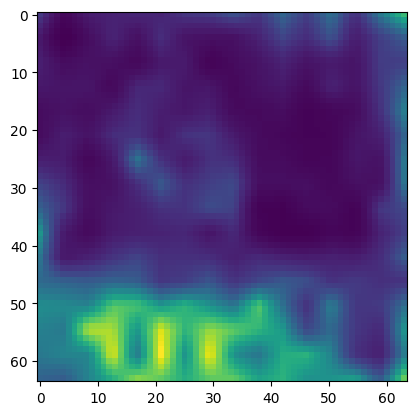

In [217]:
from matplotlib import pyplot as plt
plt.imshow(pred[0][0].cpu())

In [218]:

x = time.time()
demo_img = demo_img[None, :].cuda()

p = model.predict(demo_img)
print(time.time() - x)

0.05144238471984863


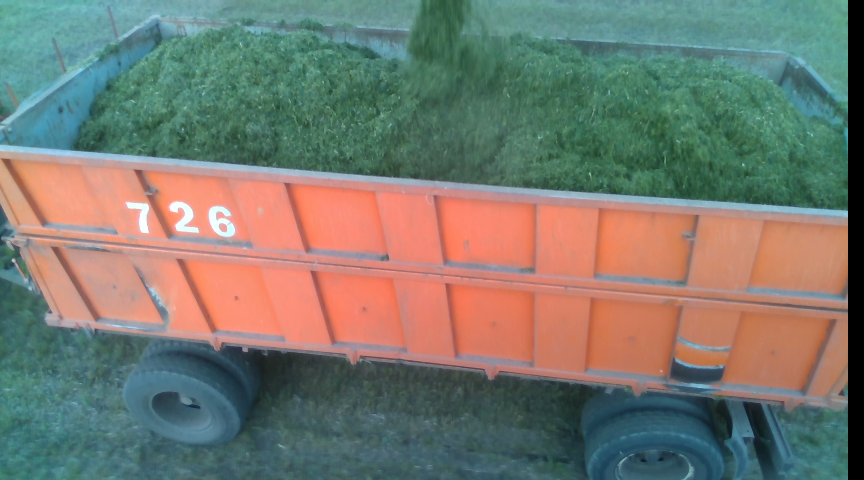

In [219]:
result.show()

In [220]:
!nvidia-smi 

Sun Sep 18 12:25:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.141.03   Driver Version: 470.141.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:06.0 Off |                    0 |
| N/A   42C    P0    26W /  70W |   7964MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [221]:
import cv2

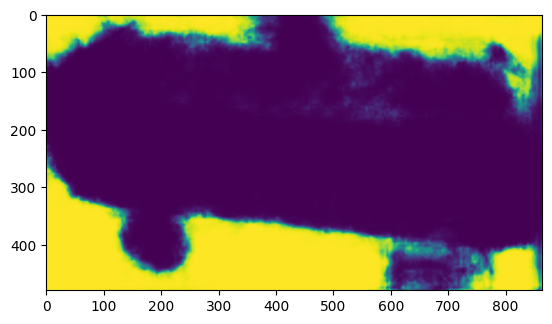

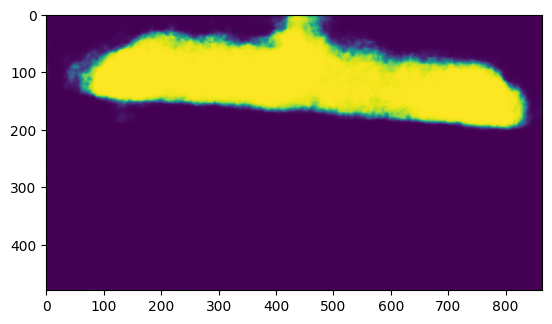

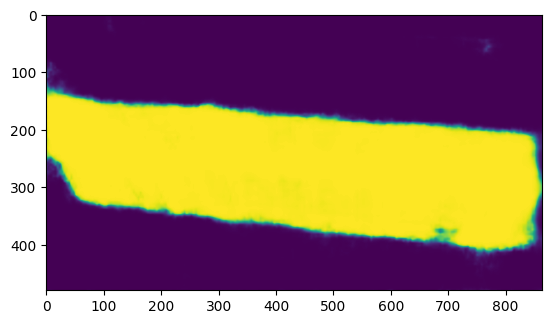

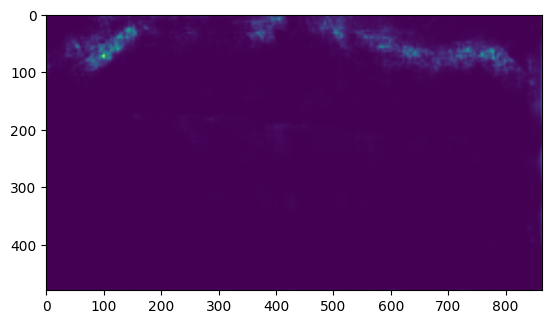

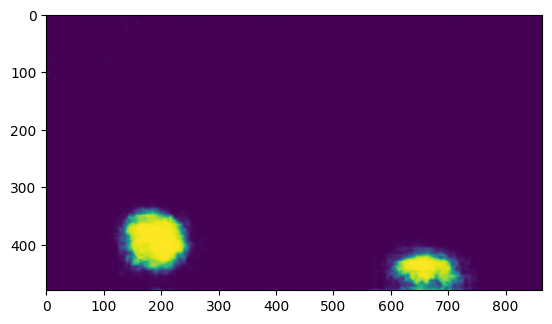

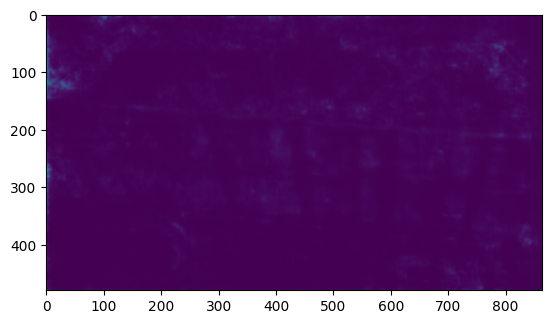

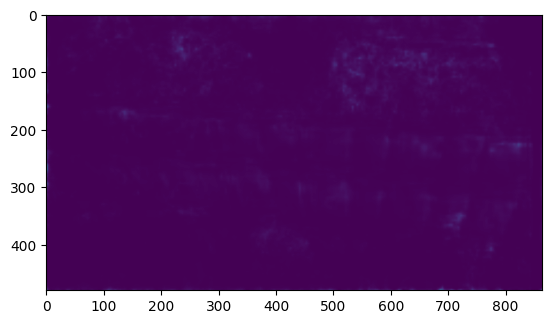

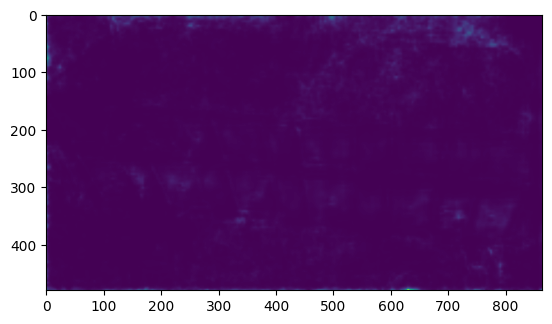

In [222]:
for i, mask in enumerate(p[0]):
    cv2.imwrite(f"masks/mask{i}.png", mask.cpu().numpy())
    plt.figure()
    plt.imshow(mask.cpu())

In [223]:
!cd masks && ls

mask0.png  mask2.png  mask4.png  mask6.png
mask1.png  mask3.png  mask5.png  mask7.png


In [224]:
print(len(p[0]))

8


In [225]:
mask = p[0][0]

In [226]:
import cv2
import numpy as np
import torch

# def apply_mask(img: np.array, mask: torch.tensor, p=0.5):
#     sh = mask.shape
    
#     img_ = np.array(img)    
#     for i in range(sh[0]):
#         for j in range(sh[1]):
#             if mask[i][j] > p:
#                 img_[i][j] = np.array([255, 255, 255])
                
#     result_img = Image.fromarray(img_)
#     return result_img


def apply_mask(img: np.array, mask: torch.tensor, p=0.5):
    sh = mask.shape
    
    img_ = np.array(img)    
#     for i in range(sh[0]):
#         for j in range(sh[1]):
#             if mask[i][j] > p:
#                 img_[i][j] = np.array([255, 255, 255])
                
    x = np.array([255, 255, 255])
    img_[mask.cpu() > p] = x
    
    result_img = Image.fromarray(img_)
    return result_img
                
#     cv2.imwrite("./masked_image.jpg", img_)
                    
    
    

100%|██████████| 8/8 [00:00<00:00, 33.22it/s]


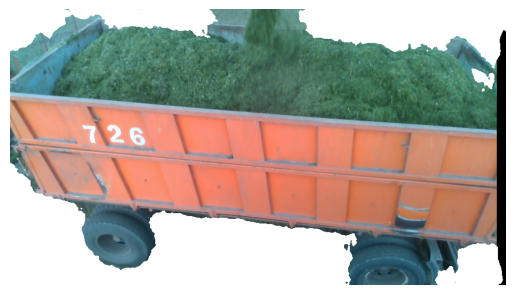

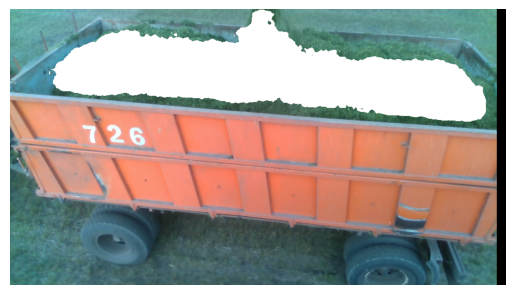

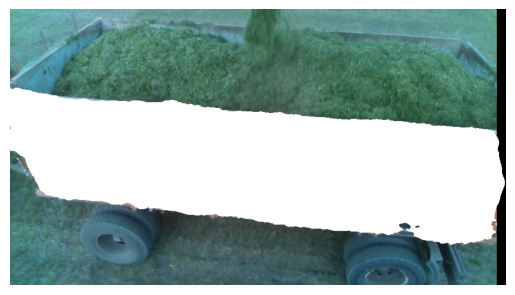

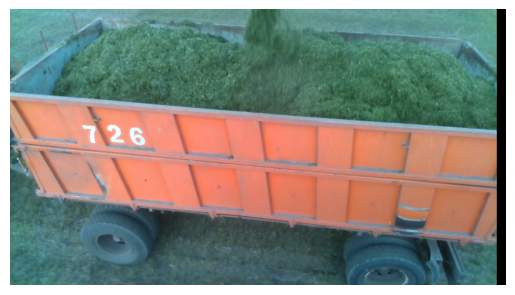

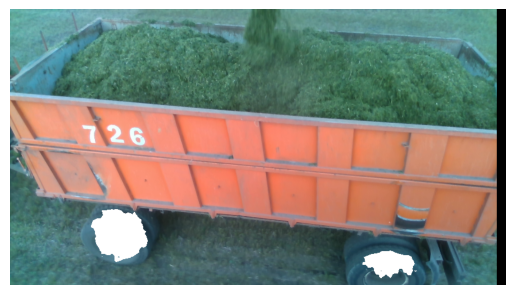

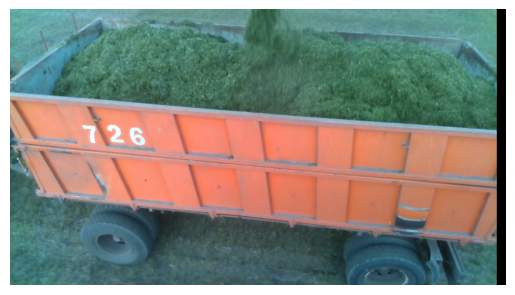

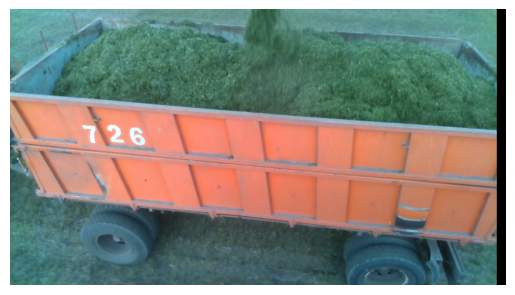

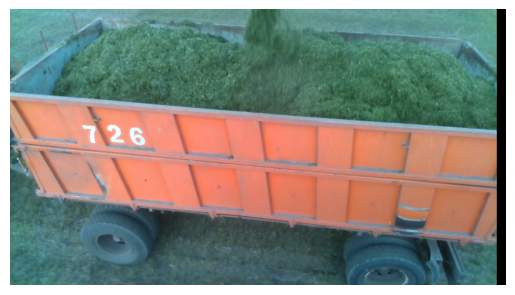

In [227]:
from tqdm import tqdm
for mask in tqdm(p[0]):
    new_img = apply_mask(result, mask, 0.8)
    plt.figure()
    plt.axis("off")
    plt.imshow(new_img)

In [228]:
mask = p[0][0]
print(mask)

tensor([[0.9642, 0.9752, 0.9829,  ..., 0.9593, 0.9646, 0.9692],
        [0.9785, 0.9852, 0.9898,  ..., 0.9621, 0.9641, 0.9659],
        [0.9871, 0.9912, 0.9940,  ..., 0.9648, 0.9635, 0.9622],
        ...,
        [0.9639, 0.9735, 0.9807,  ..., 0.4879, 0.5144, 0.5408],
        [0.9556, 0.9665, 0.9747,  ..., 0.4426, 0.4758, 0.5093],
        [0.9456, 0.9575, 0.9670,  ..., 0.3982, 0.4375, 0.4777]],
       device='cuda:0')


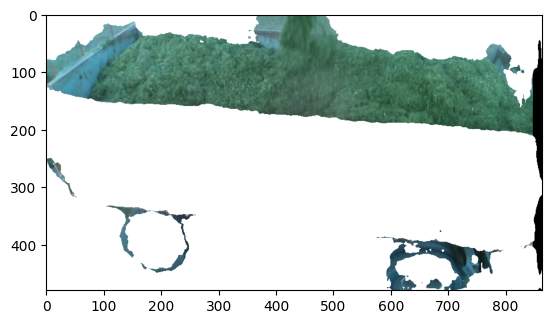

In [229]:
masked = apply_mask(result, p[0][0])
masked = apply_mask(masked, p[0][2])
masked = apply_mask(masked, p[0][4])

plt.imshow(masked)

In [230]:
points_count = 0
x_sum = 0.0
y_sum = 0.0
x_masked = []
y_masked = []
for x in range(masked.width):
        for y in range(masked.height):
            if masked.getpixel((x,y)) != (255, 255, 255):
                points_count += 1
                x_masked.append(x)
                y_masked.append(y)
#                 print(masked.getpixel((x,y)))
print(np.mean(x_masked))
print(np.mean(y_masked))
mean_coord = (int(np.mean(x_masked)), int(np.mean(y_masked)))

454.9433476677164
140.16323107409204


In [231]:
y_std = int(np.std(y_masked))

y_crop = int(y_std)

maskedStat = cv2.line(np.array(masked)
                    , (0, mean_coord[1] + y_crop), (masked.width, mean_coord[1] + y_crop), (0, 0, 255), thickness=5)
maskedStat = cv2.line(np.array(maskedStat)
                    , (0, mean_coord[1] - y_crop), (masked.width, mean_coord[1] - y_crop), (0, 0, 255), thickness=5)


x_std = int(np.std(x_masked))
maskedStat = cv2.line(np.array(maskedStat)
                    , (mean_coord[0] + x_std, 0), (mean_coord[0] + int(x_std), masked.height), (0, 0, 255), thickness=5)
maskedStat = cv2.line(np.array(maskedStat)
                    , (mean_coord[0] - x_std, 0), (mean_coord[0] - int(x_std), masked.height), (0, 0, 255), thickness=5)


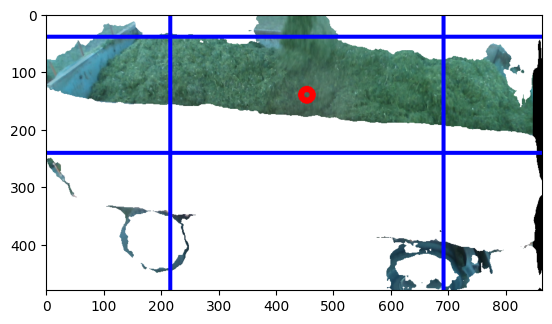

In [232]:
maskedStat = cv2.circle(np.array(maskedStat), mean_coord, 10, (255, 0, 0), 10)
plt.imshow(maskedStat)

In [233]:
img_ = np.array(masked)
x = np.array([255, 255, 255])
img_[mean_coord[1] + y_std:] = x

if mean_coord[1] - y_std >= 1:
    img_[:mean_coord[1] - y_std] = x

if mean_coord[0] - 2*x_std >= 1:
    img_[:, :mean_coord[0] - 2*x_std] = x

filtered_img = Image.fromarray(img_)

                

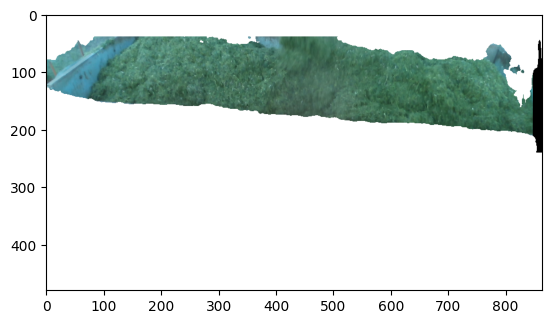

In [234]:
plt.imshow(filtered_img)

In [235]:
x_filtered = []
y_filtered = []
points_count_filtered = 0
for x in range(filtered_img.width):
        for y in range(filtered_img.height):
            if filtered_img.getpixel((x,y)) != (255, 255, 255):
                points_count_filtered += 1
                x_filtered.append(x)
                y_filtered.append(y)


mean_coord_filtered = (int(np.mean(x_filtered)), int(np.mean(y_filtered)))

In [236]:
width = np.max(x_filtered) - np.min(x_filtered)
height = np.max(y_filtered) - np.min(y_filtered)
print(width, height)

863 201


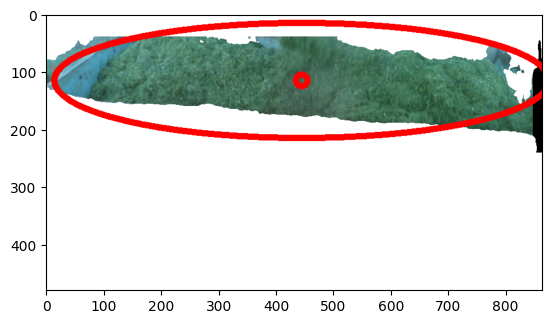

In [239]:
filtered_img = cv2.circle(np.array(filtered_img), mean_coord_filtered, 10, (255, 0, 0), 10)
filtered_img = cv2.ellipse(filtered_img, mean_coord_filtered, (int(width / 2), int(height / 2)),
           0, 0, 360, (255, 0, 0), 10)
# plt.axis("off")
plt.imshow(filtered_img)


In [238]:
,0.884259,0.610417

mean = [0.518519,0.564583]

width = result.width

result = cv2.circle(np.array(result), mean_coord_filtered, 10, (255, 0, 0), 10)
result = cv2.ellipse(np.array(result), mean_coord_filtered, (int(width / 2), int(height / 2)),
           0, 0, 360, (255, 0, 0), 10)
plt.axis("off")
plt.imshow(result)

TypeError: 'float' object is not callable

In [32]:
import numpy as np
import cv2 as cv
im = apply_mask(result, p[0][0], 0.8)
im.min
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(im, contours, -1, (0,255,0), 7)
cv.imshow('image',im)
cv.waitKey(0)

AttributeError: min

In [ ]:
!pip install kaggle

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
import os
os.chdir(r'kaggle/working')

In [ ]:
!kaggle datasets download -d alexalex02/semantic-segmentation-of-aerial-images

In [ ]:
!kaggle kernels output alexalex02/semantic-segmentation-of-aerial-images -p ./

In [ ]:
!kaggle kernels output surajdidwania/dataset-download -p /path/to/dest


In [ ]:
import os
import random
import shutil

def copy_random_photo():
    path = 'data'
    folder = random.choice(os.listdir(path))
    path += '/' + folder
    package = random.choice(os.listdir(path))
    path += '/' + package
    path += '/' + 'color_frame.png'
    shutil.copyfile(path, f"./my_train/{folder}_{package}.png")

for _ in range(10):
    copy_random_photo()